<a href="https://colab.research.google.com/github/morbosohex/Workflow/blob/master/weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 权重初始化
在本课程中，您将学习如何为神经网络找到良好的初始权重。具有良好的初始权重可以使神经网络接近最优解。这使神经网络能够更快地找到最佳解决方案。

## 测试权重
### 数据集
为了了解不同的权重如何执行，我们将在相同的数据集和神经网络上进行测试。让我们回顾一下数据集和神经网络。

我们将使用[MNIST数据集]（https://en.wikipedia.org/wiki/MNIST_database）来演示不同的初始权重。作为提醒，MNIST数据集包含手写数字0-9的图像，具有标准化输入（0.0 - 1.0）。运行下面的单元格以下载并加载MNIST数据集。

In [0]:
%matplotlib inline

import tensorflow as tf
import helper

from tensorflow.examples.tutorials.mnist import input_data

print('Getting MNIST Dataset...')
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('Data Extracted.')

W0817 21:10:33.198335 4575163840 deprecation.py:323] From <ipython-input-1-e35cd2be1b9d>:9: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0817 21:10:33.199038 4575163840 deprecation.py:323] From /Users/void/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0817 21:10:33.199779 4575163840 deprecation.py:323] From /Users/void/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Inst

Getting MNIST Dataset...
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0817 21:10:33.425231 4575163840 deprecation.py:323] From /Users/void/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Data Extracted.


### Neural Network
<img style="float: left" src="images/neural_network.png"/>

对于神经网络，我们将在具有ReLU激活和Adam优化器的3层神经网络上进行测试。您学到的课程适用于其他神经网络，包括不同的激活和优化。

In [0]:
# Save the shapes of weights for each layer
layer_1_weight_shape = (mnist.train.images.shape[1], 256)
layer_2_weight_shape = (256, 128)
layer_3_weight_shape = (128, mnist.train.labels.shape[1])

## 初始化权重
Let's start looking at some initial weights.
### 全初始化0或1
如果您遵循[奥卡姆剃刀]（https://en.wikipedia.org/wiki/Occam's_razor) 的原则， 您可能会认为将所有权重设置为0或1将是最佳解决方案。但是不是这种情况。

每个权重都相同，每层的所有神经元都产生相同的输出。这使得很难决定调整哪些权重。

让我们使用`helper.compare_init_weights`将损失与所有1和所有零权重进行比较。该函数将在上述神经网络上运行两个不同的初始权重，持续2代。它将绘制前100个批次的损失，并在2代（约860批次）后打印出统计数据。我们绘制前100个批次，以更好地判断哪些重量在开始时表现更好。

运行下面的单元格，查看所有零的权重与所有零的权重之间的差异。

W0817 21:12:36.347573 4575163840 deprecation_wrapper.py:119] From /Users/void/Documents/ArtificialIntelligence/03-DeepLearning/udacity/dl-tensorflow/weight-initialization/helper.py:26: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 21:12:36.364955 4575163840 deprecation.py:323] From /Users/void/Documents/ArtificialIntelligence/03-DeepLearning/udacity/dl-tensorflow/weight-initialization/helper.py:42: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W0817 21:12:36.388801 4575163840 deprecation_wrapper.py:119] From /Users/void/Documents/ArtificialIntelligence/03-DeepLearning/udacity/dl-tensorflow/weight-initialization/helper.py:45: The name tf.train.AdamOptimizer is deprecated. Pleas

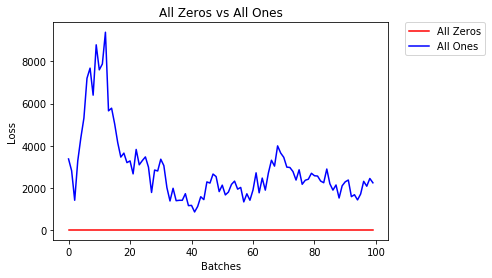

After 858 Batches (2 Epochs):
Validation Accuracy
   11.260% -- All Zeros
    9.580% -- All Ones
Loss
    2.295  -- All Zeros
  237.587  -- All Ones


In [0]:
all_zero_weights = [
    tf.Variable(tf.zeros(layer_1_weight_shape)),
    tf.Variable(tf.zeros(layer_2_weight_shape)),
    tf.Variable(tf.zeros(layer_3_weight_shape))
]

all_one_weights = [
    tf.Variable(tf.ones(layer_1_weight_shape)),
    tf.Variable(tf.ones(layer_2_weight_shape)),
    tf.Variable(tf.ones(layer_3_weight_shape))
]

helper.compare_init_weights(
    mnist,
    'All Zeros vs All Ones',
    [
        (all_zero_weights, 'All Zeros'),
        (all_one_weights, 'All Ones')])

正如您所看到的那样，对于零和1，准确度接近于猜测，大约10％。

神经网络很难确定需要改变哪些权重，因为神经元对于每一层具有相同的输出。为了避免具有相同输出的神经元，让我们使用唯一权重。我们还可以随机选择这些权重，以避免每次运行都陷入局部最小值。

获得这些随机权重的一个好方法是从均匀分布中进行采样。

### 均匀分布
[均匀分布]（https://en.wikipedia.org/wiki/Uniform_distribution_(continuous%29）具有从一组数字中挑选任何数字的相同概率。我们将从连续分布中挑选，因此选择相同数字的机会很低。我们将使用TensorFlow的`tf.random_uniform`函数从均匀分布中选取随机数。

>#### [`tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)`](https://www.tensorflow.org/api_docs/python/tf/random_uniform)
>从均匀分布输出随机值。

>生成的值遵循[minval，maxval]范围内的均匀分布。下限minval包含在范围内，而上限maxval被排除在外。

>- **shape:** 1维整型张量或python数组. 输出张量的shape.
- **minval:** 类型为dtype的0-D Tensor或Python值。要生成的随机值范围的下限。默认为0
- **maxval:** 类型为dtype的0-D Tensor或Python值。要生成的随机值范围的上限。如果dtype是浮点，则默认为1。
- **dtype:** 输出的类型：float32，float64，int32或int64。
- **seed:** 一个Python整数。用于为分布创建随机种子。请参阅tf.set_random_seed了解行为。
- **name:** 为操作命名（可选）

我们可以使用直方图来显示均匀分布。让我们使用`helper.hist_dist`函数将`tf.random_uniform（[1000]， - 3， 3）`中的值映射到直方图。这将是从“-3”到“3”的“1000”随机浮点值，不包括值“3”。

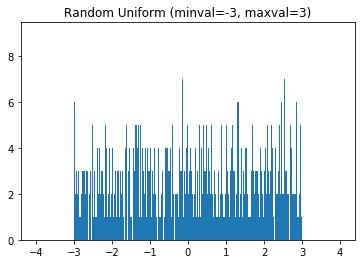

In [0]:
helper.hist_dist('Random Uniform (minval=-3, maxval=3)', tf.random_uniform([1000], -3, 3))

直方图使用500个桶来表示1000个值。由于任何一个桶的机会相同，每个桶应该有大约2个值。这正是我们用直方图看到的。有些桶有更多，有些有更少，但它们的趋势是2左右。


现在你已经理解了`tf.random_uniform`函数，让我们将它应用于一些初始权重。

### Baseline

让我们看看神经网络如何使用`tf.random_uniform`的默认值进行训练，其中`minval = 0.0`和`maxval = 1.0`。

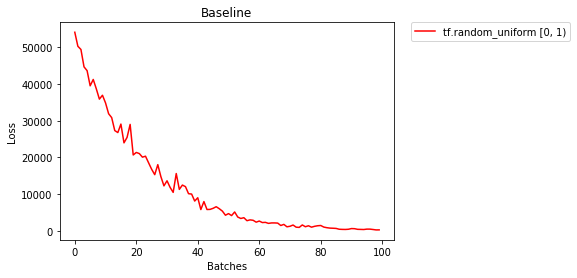

After 858 Batches (2 Epochs):
Validation Accuracy
   74.420% -- tf.random_uniform [0, 1)
Loss
   11.823  -- tf.random_uniform [0, 1)


In [0]:
# Default for tf.random_uniform is minval=0 and maxval=1
basline_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape))
]

helper.compare_init_weights(
    mnist,
    'Baseline',
    [(basline_weights, 'tf.random_uniform [0, 1)')])

损失图显示神经网络正在学习，它没有全部为零。但是正朝着正确的方向前进。

### 设置权重的一般规则
在神经网络中设置权重的一般规则是接近于零而不是太小。一个好的实践是在$[-y，y]$的范围内开始你的权重$y = 1/\sqrt{n}$（$n$是给定神经元的输入数）.

让我们看看这是否成立，让我们首先将我们的范围超过零。这将给出范围[-1,1]。

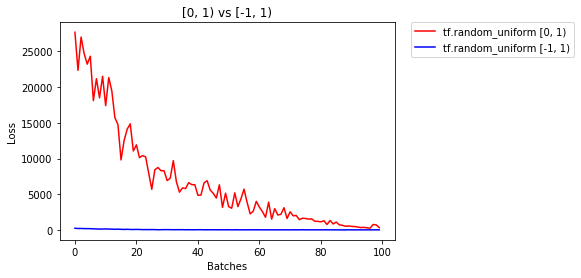

After 858 Batches (2 Epochs):
Validation Accuracy
   65.700% -- tf.random_uniform [0, 1)
   89.600% -- tf.random_uniform [-1, 1)
Loss
   31.097  -- tf.random_uniform [0, 1)
    2.601  -- tf.random_uniform [-1, 1)


In [0]:
uniform_neg1to1_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1, 1))
]

helper.compare_init_weights(
    mnist,
    '[0, 1) vs [-1, 1)',
    [
        (basline_weights, 'tf.random_uniform [0, 1)'),
        (uniform_neg1to1_weights, 'tf.random_uniform [-1, 1)')])

我们正朝着正确的方向前进，准确性和损失在[-1,1]中更好。我们仍然需要更小的权重。在它太小之前我们能走多远？

### 何时为太小的时候
让我们比较[-0.1,0.1），[ - 0.01,0.01]和[-0.001,0.001），看看它有多小。我们还将设置`plot_n_batches = None`来显示图中的所有批次。

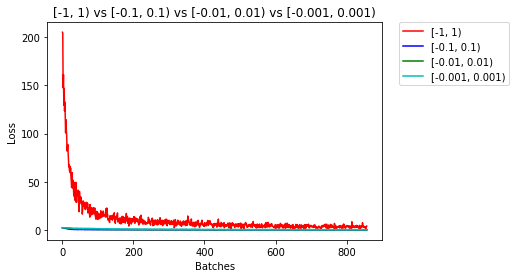

After 858 Batches (2 Epochs):
Validation Accuracy
   90.900% -- [-1, 1)
   96.980% -- [-0.1, 0.1)
   95.100% -- [-0.01, 0.01)
   93.120% -- [-0.001, 0.001)
Loss
    3.988  -- [-1, 1)
    0.055  -- [-0.1, 0.1)
    0.156  -- [-0.01, 0.01)
    0.200  -- [-0.001, 0.001)


In [0]:
uniform_neg01to01_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.1, 0.1))
]

uniform_neg001to001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.01, 0.01))
]

uniform_neg0001to0001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.001, 0.001))
]

helper.compare_init_weights(
    mnist,
    '[-1, 1) vs [-0.1, 0.1) vs [-0.01, 0.01) vs [-0.001, 0.001)',
    [
        (uniform_neg1to1_weights, '[-1, 1)'),
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (uniform_neg001to001_weights, '[-0.01, 0.01)'),
        (uniform_neg0001to0001_weights, '[-0.001, 0.001)')],
    plot_n_batches=None)

看起来像[-0.01,0.01）或更小的任何情况都太小了。让我们将其与我们使用范围$y = 1/\sqrt{n}$的一般规则进行比较。

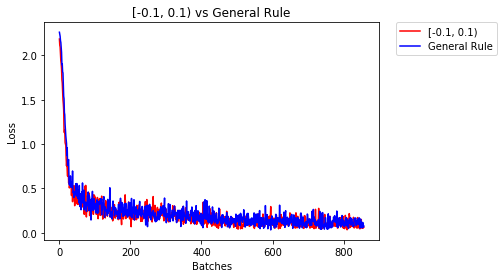

After 858 Batches (2 Epochs):
Validation Accuracy
   97.100% -- [-0.1, 0.1)
   96.460% -- General Rule
Loss
    0.063  -- [-0.1, 0.1)
    0.077  -- General Rule


In [0]:
import numpy as np

general_rule_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1/np.sqrt(layer_1_weight_shape[0]), 1/np.sqrt(layer_1_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1/np.sqrt(layer_2_weight_shape[0]), 1/np.sqrt(layer_2_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1/np.sqrt(layer_3_weight_shape[0]), 1/np.sqrt(layer_3_weight_shape[0])))
]

helper.compare_init_weights(
    mnist,
    '[-0.1, 0.1) vs General Rule',
    [
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (general_rule_weights, 'General Rule')],
    plot_n_batches=None)

我们找到的范围和$ y = 1/\sqrt{n}$非常接近。

由于均匀分布具有相同的机会来选择范围内的任何东西，如果我们使用的分布更有可能选择接近0的数字。让我们看一下正态分布。

### 正态分布
与均匀分布不同，[正态分布]（https://en.wikipedia.org/wiki/Normal_distribution）更有可能选择接近其均值的数字。为了使其可视化，让我们将TensorFlow的`tf.random_normal`函数中的值绘制为直方图。

>[tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/random_normal)

>从正态分布输出随机值

>- **shape:** 1维整型张量或python数组. 输出张量的shape.
- **mean:** 类型为dtype的0-D Tensor或Python值。正态分布的均值
- **stddev:** 类型为dtype的0-D Tensor或Python值。正态分布的标准偏差
- **dtype:** 输出的类型：float32，float64，int32或int64。
- **seed:** 一个Python整数。用于为分布创建随机种子。请参阅tf.set_random_seed了解行为。
- **name:** 为操作命名（可选）

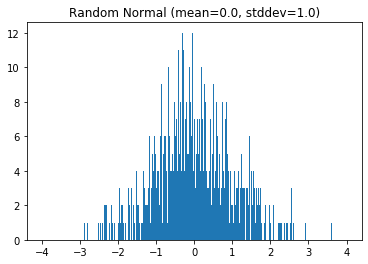

In [0]:
helper.hist_dist('Random Normal (mean=0.0, stddev=1.0)', tf.random_normal([1000]))

Let's compare the normal distribution against the previous uniform distribution.

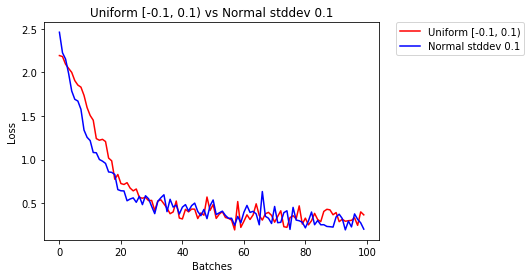

After 858 Batches (2 Epochs):
Validation Accuracy
   97.140% -- Uniform [-0.1, 0.1)
   96.640% -- Normal stddev 0.1
Loss
    0.181  -- Uniform [-0.1, 0.1)
    0.084  -- Normal stddev 0.1


In [0]:
normal_01_weights = [
    tf.Variable(tf.random_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Uniform [-0.1, 0.1) vs Normal stddev 0.1',
    [
        (uniform_neg01to01_weights, 'Uniform [-0.1, 0.1)'),
        (normal_01_weights, 'Normal stddev 0.1')])

正态分布在准确度和损失方面略有增加。让我们接近0并删除所选数字x标准偏差。此分布称为截断正态分布。

### 截断正态分布
>[tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/truncated_normal)

>从截断正态分布中输出随机值

>生成的值遵循具有指定平均值和标准偏差的正态分布，除了丢弃并重新选择幅度大于平均值2个标准偏差的值。

>- **shape:** 1维整型张量或python数组. 输出张量的shape.
- **mean:** 类型为dtype的0-D Tensor或Python值。截断正态分布的均值
- **stddev:** 类型为dtype的0-D Tensor或Python值。截断正态分布的标准偏差
- **dtype:** 输出的类型：float32，float64，int32或int64。
- **seed:** 一个Python整数。用于为分布创建随机种子。请参阅tf.set_random_seed了解行为。
- **name:** 为操作命名（可选）

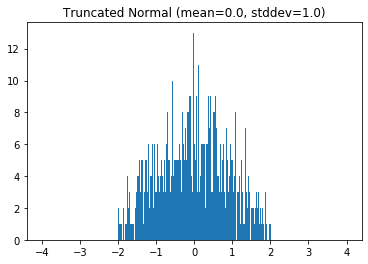

In [0]:
helper.hist_dist('Truncated Normal (mean=0.0, stddev=1.0)', tf.truncated_normal([1000],stddev=1.0))

Again, let's compare the previous results with the previous distribution.

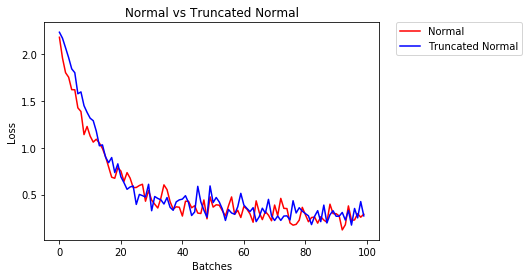

After 858 Batches (2 Epochs):
Validation Accuracy
   97.280% -- Normal
   97.160% -- Truncated Normal
Loss
    0.082  -- Normal
    0.069  -- Truncated Normal


In [0]:
trunc_normal_01_weights = [
    tf.Variable(tf.truncated_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Normal vs Truncated Normal',
    [
        (normal_01_weights, 'Normal'),
        (trunc_normal_01_weights, 'Truncated Normal')])

两者之间没有区别，但那是因为我们使用的神经网络太小了。较大的神经网络将在正态分布上选择更多的点，增加了它的选择大于2个标准偏差的可能性。 

我们距离我们测试的第一组重量已经走了很长一段路。让我们看看当时和现在使用的权重之间的差异。

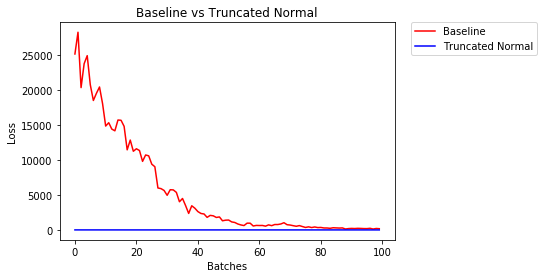

After 858 Batches (2 Epochs):
Validation Accuracy
   71.740% -- Baseline
   97.440% -- Truncated Normal
Loss
   25.529  -- Baseline
    0.036  -- Truncated Normal


In [0]:
helper.compare_init_weights(
    mnist,
    'Baseline vs Truncated Normal',
    [
        (basline_weights, 'Baseline'),
        (trunc_normal_01_weights, 'Truncated Normal')])

这是一个巨大的差异。你几乎看不到截断的法线。但是，这不是你学习之路的终点。我们为在课堂上初始化权重提供了更多资源！

# 总结
通常权重随机化有两种选择

- 对于每个权重具有唯一值的均匀分布
    - 其中分布的range最好跨过0，即从一个负数到一个正数
    - 范围的边界值为$1/\sqrt(n)$, 其中n为每一层的权重矩阵shape中的输入

对于小型网络
    
    - 使用正态分布或截断正态分布皆可
对于大型网络

    - 最好使用截断正态分布， 这样就不会从正态分布中抽取过大或过小的值
